In [5]:
using Gen, Plots, LinearAlgebra

[ Info: Precompiling SpecialFunctionsExt [997ecda8-951a-5f50-90ea-61382e97704b]


In [6]:
function getRotationMatrix(theta::Float64)
    return [cos(theta) -sin(theta); sin(theta) cos(theta)]
end

getRotationMatrix (generic function with 1 method)

In [7]:
# How to index into Matrix
A = [1 2; 3 4]
A[2,2]

4

In [8]:
function isInBox(box::Matrix{Float64}, point::Vector{Float64})
    ABn = [box[1,1]; box[2,1]] # normal defining AB
    BCn = [box[1,2]; box[2,2]]
    CDn = [box[1,3]; box[2,3]]
    DAn = [box[1,4]; box[2,4]]

    if Transpose(ABn) * point + 1 < 0 # assumes that the box is side length 2, centered at (0,0)
        return false
    end
     if Transpose(BCn) * point + 1 < 0
        return false
    end
    if Transpose(CDn) * point + 1 < 0
        return false
    end
    if Transpose(DAn) * point + 1 < 0
        return false
    end
    return true
    
end

isInBox (generic function with 1 method)

In [9]:
## DONT USE THIS FUNCTION
# function isOnBox(box::Matrix{Float64}, point::Vector{Float64})
#     ABn = [box[1,1]; box[2,1]]
#     BCn = [box[1,2]; box[2,2]]
#     CDn = [box[1,3]; box[2,3]]
#     DAn = [box[1,4]; box[2,4]]

#     epsilon = 0.00000005
#     if abs(Transpose(ABn) * point + 1) == 0.0
#         return "AB"
#     end
#      if abs(Transpose(BCn) * point + 1) == 0.0
#         return "BC"
#     end
#     if abs(Transpose(CDn) * point + 1) == 0.0
#         return "CD"
#     end
#     if abs(Transpose(DAn) * point + 1) == 0.0
#         return "DA"
#     end
#     return "None"
    
# end

In [284]:
function findIntersectionWithTrajectory(box::Matrix{Float64}, O::Vector{Float64}, V::Vector{Float64})
    ABn = [box[1,1]; box[2,1]]
    BCn = [box[1,2]; box[2,2]]
    CDn = [box[1,3]; box[2,3]]
    DAn = [box[1,4]; box[2,4]]

    tAB = Inf
    tBC = Inf
    tBC = Inf
    tDA = Inf
    
    tAB = (-1.0 - (ABn[1]* O[1]) - (ABn[2]* O[2]))/(ABn[1]*V[1] + ABn[2]*V[2])
    tBC = (-1.0 - (BCn[1]* O[1]) - (BCn[2]* O[2]))/(BCn[1]*V[1] + BCn[2]*V[2])
    tCD = (-1.0 - (CDn[1]* O[1]) - (CDn[2]* O[2]))/(CDn[1]*V[1] + CDn[2]*V[2])
    tDA = (-1.0 - (DAn[1]* O[1]) - (DAn[2]* O[2]))/(DAn[1]*V[1] + DAn[2]*V[2])

    if tAB == -Inf || tAB < 0
        tAB = Inf
    end
    if tBC == -Inf || tBC < 0
        tBC = Inf
    end
    if tCD == -Inf || tCD < 0
        tCD = Inf
    end
    if tDA == -Inf || tDA < 0
        tDA = Inf
    end
    
    current = Inf
    p = [Inf;Inf]
    n = [Inf;Inf]
    if tAB < current
        temp_p = O + V*tAB
        if isInBox(box, temp_p)
            current = tAB
            p = O + V*tAB
            n = ABn
        end
    end
    if tBC < tAB
        temp_p = O + V*tBC
        if isInBox(box, temp_p)
            current = tBC
            p = O + V*tBC
            n = BCn
        end
    end
    if tCD < current
        temp_p = O + V*tCD
        if isInBox(box, p)
            current = tCD
            p = O + V*tCD
            n = CDn
        end
    end
    if tDA < current
        temp_p = O + V*tDA
        if isInBox(box, temp_p)
            current = tCD
            p = O + V*tCD
            n = DAn
        end
    end
    return (p, -n, current) #(point of intersection, -n so the n points outward, time of intersection)
end

findIntersectionWithTrajectory (generic function with 1 method)

In [438]:
# box of side length 2 centered at (0,0)
box = [0.0 1.0 0.0 -1.0;
       -1.0 0.0 1.0 0.0]
box = getRotationMatrix(pi/6) * box #rotate by 45 degrees

2×4 Matrix{Float64}:
  0.5       0.866025  -0.5       -0.866025
 -0.866025  0.5        0.866025  -0.5

In [439]:
function getOutVector(V_in::Vector{Float64}, p::Vector{Float64}, n::Vector{Float64})
    O_out = p 
    V_out = V_in - 2 * (Transpose(V_in) * n) * n # velocity after hitting the object
    return O_out, V_out
end

getOutVector (generic function with 1 method)

In [440]:
O_in = [2.0;-2.0]
V_in = [-1.0,1.0]
p,n,t_out = findIntersectionWithTrajectory(box, O_in, V_in)
# TODO: do checks on p,n,t_out not being Inf

O_out, V_out = getOutVector(V_in, p, n)
# O_out + V_out * t_out

([Inf, Inf], [NaN, NaN])

In [441]:
@gen function line_model(O_in::Vector{Float64}, V_in::Vector{Float64}, t_out::Float64, O_out::Vector{Float64}, V_out::Vector{Float64}, xs::Vector{Float64})

    function y_in(t)
        return O_in + V_in * t
    end

    function y_out(t)
        return O_out + V_out * (t - t_out)
    end

    # function y(t)
    #     return V_in[2]/V_in[1] * t + (O[2] - V_in[2]/V_in[1]*O[1])
    # endz

    # function y_out(t)
    #     return O_in + V_in * (t - t_out)
    # end
    # function f(x)
    #     return 2.0 + 2.0*x
    # end


    for (i, t) in enumerate(ts)
        if t <= t_out
            ({(:x, i)} ~ normal(y_in(t)[1], 0.01))
            ({(:y, i)} ~ normal(y_in(t)[2], 0.01))
        else
            ({(:x, i)} ~ normal(y_out(t)[1], 0.01))
            ({(:y, i)} ~ normal(y_out(t)[2], 0.01))
        end
    end
    
    # function y(x)
    #     return 2.0 * x + 2.0
    # end

    # # Given the slope and intercept, we can sample y coordinates
    # # for each of the x coordinates in our input vector.
    # for (i, x) in enumerate(xs)
    #     # Note that we name each random choice in this loop
    #     # slightly differently: the first time through,
    #     # the name (:y, 1) will be used, then (:y, 2) for
    #     # the second point, and so on.
    #     ({(:y, i)} ~ normal(y(x), 0.1))
    # end

    # Most of the time, we don't care about the return
    # value of a model, only the random choices it makes.
    # It can sometimems be useful to return something
    # meaningful, however; here, we return the function `y`.
    return y
end;

In [442]:
ts = [0:0.1:2;];

In [453]:
ts = [0:0.1:2;];
box = [0.0 1.0 0.0 -1.0;
       -1.0 0.0 1.0 0.0]
r = pi/3
box = getRotationMatrix(r) * box #rotate by 45 degrees
O_in = [-5.0;0.0]
V_in = [5.0;0.5]
p,n,t_out = findIntersectionWithTrajectory(box, O_in, V_in)
O_out, V_out = getOutVector(V_in, p, n)

y = line_model(O_in, V_in, t_out, O_out, V_out, ts)

y (generic function with 1 method)

In [444]:
t_out

0.816182193220514

In [445]:
trace = Gen.simulate(line_model, (O_in, V_in, t_out, O_out, V_out, ts));

In [446]:
choices = Gen.get_choices(trace);

In [447]:
Gen.get_args(trace);

In [448]:
get_retval(trace)

y (generic function with 1 method)

In [449]:
choices;

In [450]:
trace[(:x, 10)]

-1.10341391463219

In [451]:
function render_trace(trace, r; show_data=true)
    
    # Pull out xs from the trace
    O_in, V_in, t_out, O_out, V_out, ts = get_args(trace)
    
    tmin = minimum(ts)
    tmax = maximum(ts)

    # Pull out the return value, useful for plotting
    y = get_retval(trace)
    
    # Draw the line
    # test_xs = collect(range(-5, stop=5, length=1000))
    fig = plot(color="black", label=nothing,
                xlim=(-10, 10), ylim=(-10, 10))
    box_plot = ([1.0, 1.0], [-1.0, 1.0], [-1.0, -1.0], [1.0, -1.0], [1.0, 1.0])
    A = getRotationMatrix(r)*box_plot[1]
    B = getRotationMatrix(r)* box_plot[2]
    C = getRotationMatrix(r)* box_plot[3]
    D = getRotationMatrix(r)* box_plot[4]
    E = getRotationMatrix(r)* box_plot[5]
    plot!([A[1],B[1],C[1],D[1],E[1]],[A[2],B[2],C[2],D[2],E[2]],
      color=:red, linewidth=2, linestyle=:solid, label="Object")

    if show_data
        xs = [trace[(:x, i)] for i=1:length(ts)]
        ys = [trace[(:y, i)] for i=1:length(ts)]
        
        # Plot the data set
        scatter!(xs, ys, c="black", label=nothing)
    end
    
    return fig
end;

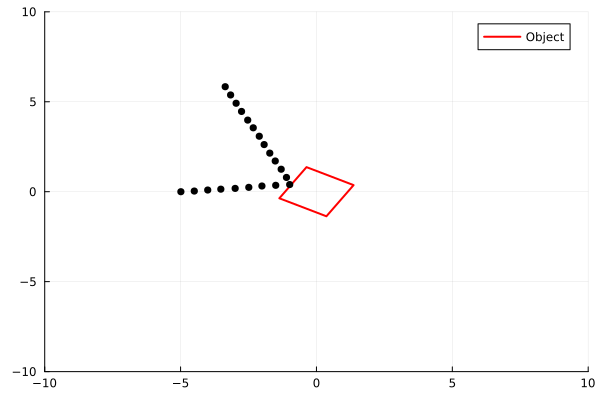

In [452]:
render_trace(trace, r)

In [170]:
using Gen

In [171]:
@gen function line_model(xs::Vector{Float64})
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = ({:slope} ~ normal(0, 1))
    intercept = ({:intercept} ~ normal(0, 2))
    
    # We define a function to compute y for a given x
    function y(x)
        return slope * x + intercept
    end

    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        # Note that we name each random choice in this loop
        # slightly differently: the first time through,
        # the name (:y, 1) will be used, then (:y, 2) for
        # the second point, and so on.
        ({(:y, i)} ~ normal(y(x), 0.1))
    end

    # Most of the time, we don't care about the return
    # value of a model, only the random choices it makes.
    # It can sometimems be useful to return something
    # meaningful, however; here, we return the function `y`.
    return y
end;

In [3]:
xs = [-5., -4., -3., -2., -1., 0., 1., 2., 3., 4., 5.];

In [4]:
y = line_model(xs)

y (generic function with 1 method)